**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [1]:
import pandas as pd

In [2]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: Dtyp

### Check no.of records and features given in each dataset

In [3]:
books.shape

(271360, 8)

In [4]:
users.shape

(278858, 3)

In [5]:
ratings.shape

(1149780, 3)

## Exploring books dataset

In [6]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [7]:
books.drop(columns=['imageUrlS','imageUrlM','imageUrlL'],inplace=True)

In [8]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [9]:
books.shape

(271360, 5)

**yearOfPublication**

### Check unique values of yearOfPublication


In [10]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [11]:
books.shape

(271360, 5)

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [12]:
books[books['yearOfPublication']=='DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [13]:
books[books['yearOfPublication']=='Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [14]:
books.drop([209538,221678,220731],inplace=True)

In [15]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

The columns have been dropped successsfully.

### Change the datatype of yearOfPublication to 'int'

In [16]:
books['yearOfPublication']=books['yearOfPublication'].astype('int')

In [17]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [18]:
books[books.publisher.isna()==True]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [19]:
books.publisher.dropna(inplace=True)

In [20]:
books.publisher.isna().sum()

0

In [21]:
books.shape

(271357, 5)

## Exploring Users dataset

In [22]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [23]:
users.Age.sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 113., 114., 115., 116., 118., 119., 123., 124., 127.,
       128., 132., 133., 136., 137., 138., 140., 141., 143., 146., 147.,
       148., 151., 152., 156., 157., 159., 162., 168., 172., 175., 183.,
       186., 189., 199., 200., 201., 204., 207., 20

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [24]:
import numpy as np
i=users[users.Age<5]
users.replace(i,np.NaN,inplace=True)
j=users[users.Age>90]
users.replace(j,np.NaN,inplace=True)

### Replace null values in column `Age` with mean

In [25]:
users.replace(np.nan,users.Age.mean(),inplace=True)

In [26]:
users.Age.sort_values().unique()

array([ 5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
       10.        , 11.        , 12.        , 13.        , 14.        ,
       15.        , 16.        , 17.        , 18.        , 19.        ,
       20.        , 21.        , 22.        , 23.        , 24.        ,
       25.        , 26.        , 27.        , 28.        , 29.        ,
       30.        , 31.        , 32.        , 33.        , 34.        ,
       34.72384042, 35.        , 36.        , 37.        , 38.        ,
       39.        , 40.        , 41.        , 42.        , 43.        ,
       44.        , 45.        , 46.        , 47.        , 48.        ,
       49.        , 50.        , 51.        , 52.        , 53.        ,
       54.        , 55.        , 56.        , 57.        , 58.        ,
       59.        , 60.        , 61.        , 62.        , 63.        ,
       64.        , 65.        , 66.        , 67.        , 68.        ,
       69.        , 70.        , 71.        , 72.        , 73.  

### Change the datatype of `Age` to `int`

In [27]:
users.Age=users.Age.astype('int')

In [28]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [29]:
ratings.shape

(1149780, 3)

In [30]:
n_users = users.shape[0]
n_books = books.shape[0]

In [31]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [32]:
ratings.bookRating.sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [33]:
book_recomm=pd.merge(ratings,books,on='ISBN')
book_recomm.shape[0]

1031132

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [34]:
user_recomm=pd.merge(book_recomm,users,on='userID')
user_recomm.shape[0]

D:\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1100: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


1026153

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [35]:
rating=user_recomm[user_recomm['bookRating']>=1]

In [36]:
rating.shape

(382116, 9)

### Find out which rating has been given highest number of times

The rating 8 has been given the highest number of times.


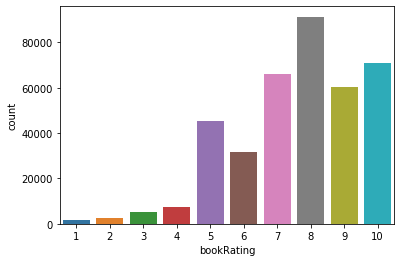

In [37]:
import seaborn as sns
%matplotlib inline
from statistics import mode
sns.countplot(data=rating,x='bookRating')
print("The rating % s has been given the highest number of times." % (mode(rating['bookRating'])))

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [38]:
c1=rating['userID'].value_counts()
c1

11676     6943
98391     5691
189835    1899
153662    1845
23902     1180
          ... 
35682        1
86873        1
88920        1
80724        1
205028       1
Name: userID, Length: 67796, dtype: int64

In [39]:
rating=rating[rating['userID'].isin(c1[c1>=100].index)]

In [40]:
rating.shape

(102977, 9)

### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [41]:
rating.isnull().sum()

userID               0
ISBN                 0
bookRating           0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            2
Location             0
Age                  0
dtype: int64

In [42]:
rating[rating['publisher'].isna()==True]

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location,Age
9752,98391,193169656X,9,Tyrant Moon,Elaine Corvidae,2002,NaN,"morrow, georgia, usa",52
9761,98391,1931696993,9,Finders Keepers,Linnea Sinclair,2001,NaN,"morrow, georgia, usa",52


In [43]:
rating.loc[9752,'publisher']= 0
rating.loc[9761,'publisher']= 0

In [44]:
rating.isnull().sum()

userID               0
ISBN                 0
bookRating           0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
Location             0
Age                  0
dtype: int64

In [45]:
rating

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location,Age
43,6543,0446605484,10,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,"strafford, missouri, usa",34
47,6543,0805062971,8,Fight Club,Chuck Palahniuk,1999,Owl Books,"strafford, missouri, usa",34
48,6543,0345342968,8,Fahrenheit 451,RAY BRADBURY,1987,Del Rey,"strafford, missouri, usa",34
49,6543,0446610038,9,1st to Die: A Novel,James Patterson,2002,Warner Vision,"strafford, missouri, usa",34
55,6543,0061009059,8,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,"strafford, missouri, usa",34
...,...,...,...,...,...,...,...,...,...
931122,240543,4888720029,10,Guidelines of faith,Satoru Izumi,1980,Nichiren Shoshu International Center,"millbrae, california, usa",67
931123,240543,4888720134,10,Treasures of the heart,Daisaku Ikeda,1982,Nichiren Shoshu International Center,"millbrae, california, usa",67
931124,240543,4888720266,10,Songs of victory: Poems and photographs,Daisaku Ikeda,1988,Nichiren Shoshu International Center,"millbrae, california, usa",67
931125,240543,4888720304,10,The creative family,Daisaku Ikeda,1992,Nichiren Shoshu International Center,"millbrae, california, usa",67


### Generate the predicted ratings using SVD with no.of singular values to be 50

In [46]:
rating_piv=rating.pivot(index='userID',columns='ISBN',values='bookRating').fillna(0)
rating_piv

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
from scipy.sparse.linalg import svds
U,sigma,vt=svds(rating_piv,k=50)

In [48]:
sigma

array([147.90973414, 149.34003703, 150.07388545, 152.19913946,
       152.87117482, 154.61236751, 154.78181492, 155.95364544,
       158.05611164, 159.20779927, 159.81356834, 162.01850373,
       162.77195774, 163.32748458, 166.02209035, 166.81339422,
       168.0412899 , 170.77476488, 171.01291334, 173.29117307,
       174.56322353, 176.64634881, 178.61901951, 180.29240787,
       182.24879961, 184.10546734, 187.61172152, 189.75155209,
       190.96969049, 195.14472184, 199.8257129 , 201.70082028,
       202.18680495, 203.4855925 , 207.26046056, 209.91587018,
       213.23541263, 216.87913486, 224.26847617, 231.66159393,
       235.6704907 , 249.94820839, 252.02436313, 261.22776382,
       267.96643064, 281.00413233, 293.69384539, 379.58246344,
       634.73977644, 680.4093915 ])

In [49]:
sigma = np.diag(sigma)

In [50]:
sigma

array([[147.90973414,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 149.34003703,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 150.07388545, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 379.58246344,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        634.73977644,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 680.4093915 ]])

In [51]:
all_users_predicted_ratings = np.dot(np.dot(U, sigma), vt)
all_users_predicted_ratings.shape

(447, 66425)

In [52]:
preds_df = pd.DataFrame(all_users_predicted_ratings,columns=rating_piv.columns)
preds_df

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
0,0.025351,-0.002174,-0.001449,-0.002174,-0.002174,0.002987,-0.003932,0.007030,0.007030,0.012337,...,0.000181,0.000227,0.042173,-0.016820,-0.080208,0.004754,0.028294,0.000121,-0.001675,0.067534
1,-0.010009,-0.003679,-0.002452,-0.003679,-0.003679,0.001078,0.001443,-0.003501,-0.003501,0.001613,...,-0.000363,0.000401,0.008203,0.001094,-0.029222,0.000997,0.002360,-0.000242,0.000030,-0.013055
2,-0.015075,-0.015525,-0.010350,-0.015525,-0.015525,0.007305,-0.013975,0.011954,0.011954,0.011908,...,-0.000448,0.001923,0.047933,0.005715,0.118426,0.006996,0.003137,-0.000299,0.009068,-0.057819
3,-0.021511,0.035632,0.023755,0.035632,0.035632,0.030263,0.024294,-0.000977,-0.000977,0.067608,...,0.002977,0.009925,0.085647,-0.008699,0.017034,0.028873,-0.000043,0.001985,0.031172,-0.046818
4,0.002056,-0.008016,-0.005344,-0.008016,-0.008016,0.002961,0.003092,0.000234,0.000234,0.006160,...,0.002124,0.001608,-0.012244,0.009408,0.673978,0.002632,-0.008211,0.001416,0.004959,0.047685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,-0.013336,-0.003303,-0.002202,-0.003303,-0.003303,-0.023609,0.250731,0.005670,0.005670,-0.028353,...,0.001878,-0.007805,0.063534,-0.001408,0.129483,-0.020470,0.007287,0.001252,-0.023863,0.100763
443,0.017262,0.021076,0.014051,0.021076,0.021076,0.016248,0.045589,0.017285,0.017285,0.009540,...,-0.002715,0.002187,0.237966,-0.002890,0.057664,0.014205,0.010582,-0.001810,0.008166,-0.071377
444,0.003797,-0.011231,-0.007487,-0.011231,-0.011231,0.007797,-0.012428,0.005991,0.005991,0.022378,...,0.002613,0.003696,0.015328,0.021518,-0.051447,0.008122,0.005774,0.001742,0.008564,0.126025
445,0.078004,-0.024498,-0.016332,-0.024498,-0.024498,0.011783,-0.018103,-0.005807,-0.005807,0.027346,...,0.000460,0.003483,0.060635,0.010374,-0.073851,0.012124,0.008566,0.000306,0.010233,0.035848


In [53]:
def recommend_books(predictions_df, user_id,userID, books_df, original_ratings_df, num_recommendations = False):
    user_row_number = user_id #UserID starts at zero not 1
    sorted_user_predictions = predictions_df.loc[user_row_number].sort_values(ascending = False)
    
    user_data1 = original_ratings_df[original_ratings_df.userID == (userID)]
    user_full = (user_data1.merge(books_df, how = 'left', left_on = 'ISBN', right_on = 'ISBN').
                sort_values(['bookRating'], ascending = False)
                )
    
    # Books that user has read, rated and using dropna() finding count of books that are not read before as rating is nan
    print('User {0} has already rated {1} books.'.format(userID, user_full.dropna().shape[0]))
    
    #printing how many books to recommend 
    
    print('Recommending the highest {0} predicted ratings book not already rated.'.format(num_recommendations))
    
    
    # finding the predictions by comparing original data with predictions outputs 
    recommendations = (books_df[~books_df['ISBN'].isin(user_full['ISBN'])].
                      merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
                           left_on = 'ISBN',
                           right_on = 'ISBN').
                      rename(columns = {user_row_number: 'Predictions'}).
                       
                       #sort the predictions 
                      sort_values('Predictions', ascending = False).
                      iloc[:num_recommendations, :-1])
    return user_full, recommendations, sorted_user_predictions, user_data1, user_full

### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [54]:
userID = 2110

In [55]:
user_id = 2
#2nd row in ratings matrix and predicted matrix

In [56]:
already_rated, predictions, sorted_user_predictions, user_data1, user_full = recommend_books(preds_df, user_id, userID, books, rating, 10)

User 2110 has already rated 103 books.
Recommending the highest 10 predicted ratings book not already rated.


### Get the predicted ratings for userID `2110` and sort them in descending order

In [57]:
sorted_user_predictions

ISBN
0316666343    1.004378
059035342X    0.778162
0345350499    0.700312
0440214041    0.666304
044021145X    0.664469
                ...   
0380709562   -0.163341
0553213164   -0.173982
0440219078   -0.175482
0807508527   -0.204693
0743235150   -0.208705
Name: 2, Length: 66425, dtype: float64

### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [58]:
user_data=pd.DataFrame(data=user_data1,columns=['userID','ISBN','bookRating'])
user_data

,userID,ISBN,bookRating
667741,2110,059035342X,10
667745,2110,0590448595,8
667748,2110,0451137965,9
667749,2110,0590629786,10
667750,2110,0590629794,10
...,...,...,...
667898,2110,1558504184,8
667899,2110,1561008931,7
667900,2110,1565111575,10
667902,2110,1570420564,10


### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [59]:
book_data=pd.DataFrame(data=user_data1,columns=['ISBN','bookTitle','bookAuthor','yearOfPublication','publisher'])

In [60]:
book_data.shape

(103, 5)

In [61]:
book_data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
667741,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
667745,0590448595,Karen's School Trip (Baby-Sitters Little Siste...,Ann M. Martin,1992,Scholastic Paperbacks (Mm)
667748,0451137965,Thinner,Stephen King,1985,New Amer Library
667749,0590629786,"The Visitor (Animorphs, No 2)",K. A. Applegate,1996,Scholastic
667750,0590629794,"The Encounter (Animorphs , No 3)",K. A. Applegate,1996,Scholastic


In [66]:
user_full_info=pd.merge(book_data,user_data,on='ISBN')

In [67]:
user_full_info.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,userID,bookRating
0,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,2110,10
1,0590448595,Karen's School Trip (Baby-Sitters Little Siste...,Ann M. Martin,1992,Scholastic Paperbacks (Mm),2110,8
2,0451137965,Thinner,Stephen King,1985,New Amer Library,2110,9
3,0590629786,"The Visitor (Animorphs, No 2)",K. A. Applegate,1996,Scholastic,2110,10
4,0590629794,"The Encounter (Animorphs , No 3)",K. A. Applegate,1996,Scholastic,2110,10


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [68]:
predictions

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
407,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
2116,0345350499,The Mists of Avalon,MARION ZIMMER BRADLEY,1987,Del Rey
2438,0440214041,The Pelican Brief,John Grisham,1993,Dell
455,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group
521,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
20670,0345318862,Golem in the Gears (Xanth Novels (Paperback)),PIERS ANTHONY,1986,Del Rey
4810,0345313151,Bearing an Hourglass (Incarnations of Immortal...,Piers Anthony,1991,Del Rey Books
6320,0380752891,"Man from Mundania (Xanth Trilogy, No 12)",Piers Anthony,1990,Harper Mass Market Paperbacks
44448,051511605X,Undue Influence,Steven Paul Martini,1995,Jove Books
8977,043936213X,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,2001,Scholastic
